In [1]:
import pandas as pd
import numpy as np

# fuzz is used to compare TWO strings
from fuzzywuzzy import fuzz

# process is used to compare a string to MULTIPLE other strings
from fuzzywuzzy import process

In [2]:
pts = pd.read_csv('../data/playlists_tracks.csv')

In [3]:
pts.sample(n=10)

,playlist_id,added_at,added_by_id,isrc,artists,explicit,track_id,name,popularity,preview_url,album_type,album_id,album_name,release_date,playlist_name,description
780694,67IEX5Nrgs7UQFhETcFZtK,2019-05-31T16:48:18Z,thesoundsofspotify,CHAAA1505697,[{'external_urls': {'spotify': 'https://open.s...,False,4E9bXmR0xEsm9wmpEQaCuI,Lost Wisdom - Burzum Cover,1.0,https://p.scdn.co/mp3-preview/d5084cd6ee1c0c1e...,album,6jvoDykrIAcq5p4Bj6dszV,"Through the Chaos, Through Time, Through the D...",2015-09-26,Ukrainian Black Metal,"See also the Sounds of <a href=""spotify:playli..."
782803,2sto3QLsWEIB8TLyoVaDbF,2019-01-03T19:58:30Z,thesoundsofspotify,BRTRB1300361,[{'external_urls': {'spotify': 'https://open.s...,False,1tJT4qEWdV7zh8L7gBpg12,Maria Navalha (Cuidado Seu Zé / Malandrinha do...,26.0,https://p.scdn.co/mp3-preview/9f2ae1c2f6b97c76...,album,0mPgTWKh0V3zEwrj8XgGTl,No Clarão da Lua!,2009-05-06,Umbanda,"See also <a href=""spotify:playlist:6H3SzRp3GD3..."
652809,34WeHDUbOzCgLD3ahlQwEN,2020-04-06T16:03:40Z,thesoundsofspotify,US7VG1822985,[{'external_urls': {'spotify': 'https://open.s...,False,42WMypYT6Ds6KzNqPH4NDS,Pássaro Azul,6.0,https://p.scdn.co/mp3-preview/0c944ab11315f220...,album,3QQbaguKMGxZ89aOly0WRS,Asé de Fala,2018-11-01,Rio Grande do Sul Indie,"See also <a href=""spotify:playlist:0wGg1REaeVA..."
463523,7J9GDUnv2JMOvNK6xCKCE1,2019-08-04T16:31:31Z,thesoundsofspotify,GBBMP0900532,[{'external_urls': {'spotify': 'https://open.s...,False,5RNGOlGqKBawkqLfdJqiqA,Nothing Is Something Worth Doing,45.0,https://p.scdn.co/mp3-preview/b3aa4fab063bf85c...,album,6kXYzl5HwGgFxsX1M8aTKp,Ineffable Mysteries From Shpongleland,2009-10-28,Livetronica,"See also <a href=""spotify:playlist:0K6tUy2gBM0..."
666676,0Evf0zY8yZLBDOXJCLERQi,2020-04-06T16:05:15Z,thesoundsofspotify,GBLFP1839292,[{'external_urls': {'spotify': 'https://open.s...,False,2daW71kpe9FbscotDk7iPU,El Matrimonio,41.0,https://p.scdn.co/mp3-preview/1625d3d770c7cc91...,single,0XUHEHh9LTiItSuxg188p0,El Matrimonio,2018-04-27,Salsa Choke,"See also <a href=""spotify:playlist:1NMpw1xIPYJ..."
685586,2aKMOs9FxzuCX6kdylLX94,2020-01-24T18:00:23Z,thesoundsofspotify,ushm80821954,[{'external_urls': {'spotify': 'https://open.s...,False,4fqo4oqNE574otPyqOBG2H,I Was Busted,21.0,https://p.scdn.co/mp3-preview/e3493a215affd006...,album,53UuY45mRY4a32kiBUGkYi,The Skinheads Dem A Come,2008-09-10,Ska,"See also <a href=""spotify:playlist:6hbqqwOsb06..."
692998,0qxI6lRUwws4qXyriYiINB,2016-03-31T18:39:25Z,thesoundsofspotify,TCACA1419878,[{'external_urls': {'spotify': 'https://open.s...,False,7lkGmr7Pd72rgG57AoYvtT,Wanna Try,30.0,https://p.scdn.co/mp3-preview/ed5bf6145deb44ad...,single,1W7IMS6klvF0HNb0vO3MWm,Wanna Try,2014-10-14,Slow Game,"See also <a href=""spotify:playlist:01WqT4JhpTr..."
370271,4j8LWu769e0bze06dcZV7W,2020-03-27T17:51:03Z,thesoundsofspotify,FRZ131914030,[{'external_urls': {'spotify': 'https://open.s...,False,7v1V4ZTjZP03LgesiDfJbi,"Violin Concerto in C Major, RV 187: III. Allegro",24.0,https://p.scdn.co/mp3-preview/d6e13cf7bfc89d3b...,album,4mIXKH9qHdE7yph4gxsHod,"VIVALDI Concerti per violino VIII ""Il teatro""",2020-02-21,Historically Informed Performance,"See also <a href=""spotify:playlist:3qYPaO9x47Z..."
18524,0Hwb2a9DJdom4yoe5V41K9,2020-01-24T17:18:53Z,thesoundsofspotify,QM24S2000002,[{'external_urls': {'spotify': 'https://open.s...,True,1rMGsPcELyYLwm87GNHFai,God Nem (Remix),39.0,https://p.scdn.co/mp3-preview/0ad1f5908d24a1e6...,single,6VWW06nIJ6AGHcHmn9i1Xr,God Nem (Remix),2020-01-13,Alternative R&B,"See also <a href=""spotify:playlist:7JKehYszt7i..."
609074,0m55vLjsDe1eh1MjdPufNH,2015-06-02T16:22:14Z,thesoundsofspotify,TCACC1489365,[{'external_urls': {'spotify': 'https://open.s...,True,14Ap252tBaZpjlUD17Uf2r,Gtfo My Way,25.0,https://p.scdn.co/mp3-preview/b272465c9b67c3f3...,single,74QAdnP8h1IBjw1jVzLvAS,The Tactician,2014-12-21,Post-Post-Hardcore,"See also <a href=""spotify:playlist:4rdpveN5pDv..."


In [4]:
pts.playlist_name.value_counts()

 Rock                 1173
 Dance Pop            1135
 Pop                  1126
 Electro House        1004
 Indie Folk            994
                      ... 
 Congo (Kinshasa)       37
 Spanish Classical      32
 Animal Singing         27
 Saint-Martin           11
 Saint Lucia             5
Name: playlist_name, Length: 3602, dtype: int64

In [5]:
pts.shape

(822081, 16)

In [6]:
pts.groupby('track_id').playlist_name.nunique()

track_id
0001Wtl60puR26ZtSDIF66    1
0006ylYpVNXBQIVMe8geYq    1
000A6NeXllTYLj5YPwmjvB    1
000NlfzLnOP88OsQiD5fGo    1
000QWvZpHrBIVrW4dGbaVI    1
                         ..
7zzYmYrt16PNK0ukHCZdkV    2
7zzbd4y23NEiZkeTtMNV7t    1
7zzbfi8fvHe6hm342GcNYl    3
7zzrSxLP3uZNwRxADYw7CY    1
7zztk8Ecg9qDRLX3XNfSyq    3
Name: playlist_name, Length: 572500, dtype: int64

In [7]:
# 3602 unique genres
pts.playlist_name.nunique()

3602

In [8]:
# construct "genre-superclusters" based on MusicMap.info super-genres
# 1) get a list of all unique genres
genres = pts.playlist_name.unique()
genres[:5]

array([' 21st Century Classical', ' 432Hz', ' 8-Bit', ' A Cappella',
       ' Aarhus Indie'], dtype=object)

In [13]:
# from scripts.config import SPOTIPY_CLIENTS, SPOTIPY_CREDS, SPOTIPY_REQUESTS_TIMEOUT  # noqa
from scripts.utils import SpotipyMux
from tqdm.notebook import tqdm, tnrange, trange
from pprint import pprint

In [10]:
%%time

# use fuzzy-word matching to find "genre-superclusters"
process.extract("Classical", genres, limit=200, scorer=fuzz.token_set_ratio)


CPU times: user 65 ms, sys: 285 µs, total: 65.3 ms
Wall time: 64.3 ms


[(' 21st Century Classical', 100),
 (' American Contemporary Classical', 100),
 (' American Modern Classical', 100),
 (' American 21st Century Classical', 100),
 (' Andalusian Classical', 100),
 (' Baltic Classical', 100),
 (' Belgian Contemporary Classical', 100),
 (' British Contemporary Classical', 100),
 (' British Modern Classical', 100),
 (' Canadian Classical', 100),
 (' Chinese Classical', 100),
 (' Chinese Classical Performance', 100),
 (' Classical', 100),
 (' Classical Accordion', 100),
 (' Classical Baritone', 100),
 (' Classical Bass', 100),
 (' Classical Bassoon', 100),
 (' Classical Cello', 100),
 (' Classical Clarinet', 100),
 (' Classical Contralto', 100),
 (' Classical Countertenor', 100),
 (' Classical Era', 100),
 (' Classical Flute', 100),
 (' Classical Guitar', 100),
 (' Classical Guitar Duo', 100),
 (' Classical Guitar Quartet', 100),
 (' Classical Harp', 100),
 (' Classical Horn', 100),
 (' Classical Mandolin', 100),
 (' Classical Mezzo-Soprano', 100),
 (' Class

In [16]:
import spotipy
# collect 
spm = SpotipyMux(0)
track_ids = pts.track_id.unique()
audio_features = []

# Loop through track_ids list to collect audio feautres pertaining to
# each track. Normally, we would loop through the passed in tracks list and
# update each track's dictionaries with the assocaited audio features
# metadata. But, this would require making a single API request for each
# track, making our function much slower. A more efficient way is to
# include multiple track ids in each api request. But, this requires us to
# merge the audio features metadata with the tracks metadata. Thus, we
# create a list of track ids and a list to store the audio features
# pertaining to the track id.
for start in tqdm(range(0, len(track_ids), 50)):
    end = start + 50 if (start + 50) < len(track_ids) else None
    try:
        # request audio features from Spotify API
        raw_audio_features = spm.client().audio_features(track_ids[start:end])
        # format metadata for database
        for track in raw_audio_features:
            track = {
                "danceability": track.get("danceability", None),
                "energy": track.get("energy", None),
                "key": track.get("key", None),
                "loudness": track.get("loudness", None),
                "mode": track.get("mode", None),
                "speechiness": track.get("speechiness", None),
                "acousticness": track.get("acousticness", None),
                "instrumentalness": track.get("instrumentalness", None),
                "liveness": track.get("liveness", None),
                "valence": track.get("valence", None),
                "tempo": track.get("tempo", None),
                "track_id": track.get("id", None),
                "time_signature": track.get("time_signature", None),
            }
            audio_features.append(track)
    except spotipy.client.SpotifyException as e:
        print(f"Spotify ERROR: {e}")
    except Exception as e:
        print(f"ERROR: {e}")

ERROR: 'float' object has no attribute 'split'
ERROR: 'NoneType' object has no attribute 'get'
retrying after...1secs
ERROR: 'NoneType' object has no attribute 'get'
ERROR: 'NoneType' object has no attribute 'get'
retrying after...1secs
retrying after...1secs
retrying after...1secs
retrying after...1secs
retrying after...1secs
retrying after...1secs
retrying after...1secs
ERROR: 'NoneType' object has no attribute 'get'
ERROR: 'NoneType' object has no attribute 'get'
ERROR: 'NoneType' object has no attribute 'get'
ERROR: 'NoneType' object has no attribute 'get'
ERROR: 'NoneType' object has no attribute 'get'
ERROR: 'NoneType' object has no attribute 'get'
ERROR: 'NoneType' object has no attribute 'get'
ERROR: 'NoneType' object has no attribute 'get'



In [41]:
def get_audio_features(track_ids):
    """Collects Spotify audio features for a set of track
    
    Args:
        track_ids (list): A list of Spotify track ids. The list size should be 
            less than 50.
    
    Returns:
        audio_feats (list): A list of audio features dictionaries 
    """
    spm = SpotipyMux(np.random.randint(0,100))
    
    audio_feats = []
    try:
        # request audio features from Spotify API
        raw_audio_features = spm.client().audio_features(track_ids)
        # format metadata for database
        for track in raw_audio_features:
            track = {
                "danceability": track.get("danceability", None),
                "energy": track.get("energy", None),
                "key": track.get("key", None),
                "loudness": track.get("loudness", None),
                "mode": track.get("mode", None),
                "speechiness": track.get("speechiness", None),
                "acousticness": track.get("acousticness", None),
                "instrumentalness": track.get("instrumentalness", None),
                "liveness": track.get("liveness", None),
                "valence": track.get("valence", None),
                "tempo": track.get("tempo", None),
                "track_id": track.get("id", None),
                "time_signature": track.get("time_signature", None),
            }
            audio_features.append(track)
    except Exception as e:
        print(f"ERROR: {e}")
        
    return audio_feats

In [42]:
track_ids = pts.track_id.unique()
spm = SpotipyMux(0)

chunked_ids = chunkify(track_ids, chunk_size=50)

In [43]:
from concurrent.futures import ThreadPoolExecutor, as_completed
from multiprocessing import cpu_count


audio_features = []
num_workers = cpu_count() - 4
with ThreadPoolExecutor(max_workers=num_workers) as executor:
    # Start the load operations and mark each future with its URL
    future_to_feats = {executor.submit(get_audio_features, track_ids_i): track_ids_i for track_ids_i in chunked_ids}
    for future in tqdm(as_completed(future_to_feats), total=len(future_to_feats)):
        track_ids_ = future_to_feats[future]
        try:
            data = future.result()
            audio_features.extend(data)
        except Exception as exc:
            print('%r generated an exception: %s' % (track_ids, exc))


retrying after...8secs
retrying after...8secs
retrying after...8secs


retrying after...8secsretrying after...8secs

retrying after...8secs
retrying after...8secs
retrying after...8secs
retrying after...8secs
retrying after...8secsretrying after...8secs

retrying after...8secs
retrying after...8secsretrying after...8secs

retrying after...8secs
retrying after...8secs
retrying after...8secs
retrying after...8secs
retrying after...8secs
retrying after...8secs
retrying after...8secsretrying after...8secs

retrying after...8secs
retrying after...8secsretrying after...8secs
retrying after...8secs

retrying after...8secs
retrying after...8secs
retrying after...8secs
retrying after...8secs
retrying after...8secs
retrying after...8secs
retrying after...8secs
retrying after...8secs
retrying after...8secs
retrying after...8secs
retrying after...8secs
retrying after...8secs
retrying after...8secs
retrying after...8secs
retrying after...8secsretrying after...8secs
retrying after...8secs

retrying after...8secs
retrying after...8secsretrying after...8secs
retrying aft

KeyboardInterrupt: 

In [17]:
len(audio_features)

572120

In [18]:
pprint(audio_features[0])

{'acousticness': 0.914,
 'danceability': 0.378,
 'energy': 0.0947,
 'instrumentalness': 0.0357,
 'key': 2,
 'liveness': 0.11,
 'loudness': -21.929,
 'mode': 1,
 'speechiness': 0.0536,
 'tempo': 129.94,
 'time_signature': 3,
 'track_id': '3yMHcBA4FrPxCUUeL9eRZ9',
 'valence': 0.127}


In [20]:
pts = pts.merge(pd.DataFrame(audio_features), on='track_id')

In [21]:
pts.head()

,playlist_id,added_at,added_by_id,isrc,artists,explicit,track_id,name,popularity,preview_url,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2HUpNZLoYHe0Sa9dglqQOg,2018-05-05T00:20:09Z,None,None,[{'external_urls': {'spotify': 'https://open.s...,False,3yMHcBA4FrPxCUUeL9eRZ9,"Piano Trio No. 2, ""Knotted Fields""",0.0,https://p.scdn.co/mp3-preview/13f1f904a6b310c0...,...,2,-21.929,1,0.0536,0.914,0.0357,0.1100,0.1270,129.940,3
1,3R0cCFr2WTRnMH63bYR1qM,2018-08-30T15:41:39Z,thesoundsofspotify,ATK940828201,[{'external_urls': {'spotify': 'https://open.s...,False,3yMHcBA4FrPxCUUeL9eRZ9,"Piano Trio No. 2, ""Knotted Fields""",0.0,https://p.scdn.co/mp3-preview/13f1f904a6b310c0...,...,2,-21.929,1,0.0536,0.914,0.0357,0.1100,0.1270,129.940,3
2,2HUpNZLoYHe0Sa9dglqQOg,2018-10-12T14:23:12Z,None,None,[{'external_urls': {'spotify': 'https://open.s...,False,5m5HHJhmpzOOt2hfEhDnap,Die schrecklich-gewaltigen Kinder: Großseufzer 1,0.0,https://p.scdn.co/mp3-preview/d5ffbf77dfbbe242...,...,5,-13.099,1,0.0652,0.962,0.1990,0.0835,0.0721,85.317,5
3,5vZJbTAT5UlOVc0jhWT3ao,2018-10-12T15:29:56Z,thesoundsofspotify,DEC441809887,[{'external_urls': {'spotify': 'https://open.s...,False,5m5HHJhmpzOOt2hfEhDnap,Die schrecklich-gewaltigen Kinder: Großseufzer 1,0.0,https://p.scdn.co/mp3-preview/d5ffbf77dfbbe242...,...,5,-13.099,1,0.0652,0.962,0.1990,0.0835,0.0721,85.317,5
4,2HUpNZLoYHe0Sa9dglqQOg,2019-04-12T15:22:27Z,None,None,[{'external_urls': {'spotify': 'https://open.s...,False,2EFYDHYQL6K0GYmTKa5wSV,Hitzaurre Bi: I. —,1.0,https://p.scdn.co/mp3-preview/4fe4e9a3e433715d...,...,8,-21.290,1,0.0446,0.937,0.8350,0.1260,0.0682,81.926,4


In [22]:
pts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 821407 entries, 0 to 821406
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   playlist_id       821407 non-null  object 
 1   added_at          821407 non-null  object 
 2   added_by_id       821397 non-null  object 
 3   isrc              821117 non-null  object 
 4   artists           821407 non-null  object 
 5   explicit          821407 non-null  object 
 6   track_id          821407 non-null  object 
 7   name              821407 non-null  object 
 8   popularity        821407 non-null  float64
 9   preview_url       712834 non-null  object 
 10  album_type        821397 non-null  object 
 11  album_id          821397 non-null  object 
 12  album_name        821397 non-null  object 
 13  release_date      821397 non-null  object 
 14  playlist_name     821407 non-null  object 
 15  description       821407 non-null  object 
 16  danceability      82

In [23]:
pts.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,821407.000000,821407.000000,821407.000000,821407.000000,821407.000000,821407.000000,821407.000000,821407.000000,821407.000000,821407.000000,821407.000000,821407.000000,821407.000000
mean,22.910924,0.539131,0.616195,5.289596,-9.297071,0.632860,0.085052,0.329177,0.233970,0.193424,0.471998,121.261005,3.889084
std,19.478029,0.189613,0.265371,3.552935,5.510345,0.482025,0.106247,0.351315,0.355227,0.161452,0.272287,29.494079,0.442474
min,0.000000,0.000000,0.000000,0.000000,-59.502000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.409000,0.433000,2.000000,-11.316000,0.000000,0.036100,0.010800,0.000001,0.095300,0.240000,98.318500,4.000000
50%,19.000000,0.553000,0.658000,5.000000,-7.872000,1.000000,0.048500,0.171000,0.001190,0.126000,0.461000,120.125000,4.000000
75%,38.000000,0.683000,0.842000,8.000000,-5.630000,1.000000,0.085000,0.645000,0.515000,0.247000,0.695000,139.944000,4.000000
max,100.000000,0.989000,1.000000,11.000000,5.994000,1.000000,0.970000,0.996000,1.000000,1.000000,1.000000,247.949000,5.000000


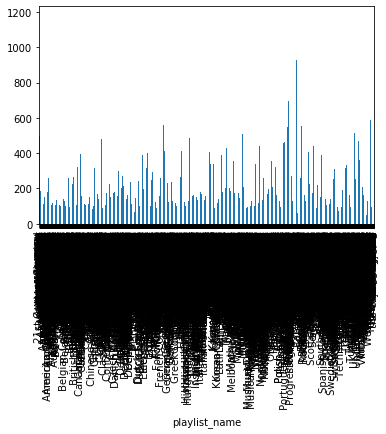

In [25]:

pts.groupby('playlist_name').apply(lambda x: x['track_id'].nunique()).plot(kind='bar')

In [26]:
genre_counts = pts.groupby('playlist_name').apply(lambda x: x['track_id'].nunique())
genre_counts

playlist_name
 21st Century Classical    496
 432Hz                     102
 8-Bit                     106
 A Cappella                336
 Aarhus Indie              119
                          ... 
 Zürich Indie              102
 the Czech Republic        100
 Çifteli                    98
 Çocuk Şarkısı             117
 İlahiler                  121
Length: 3602, dtype: int64

In [28]:
genre_counts.to_csv('/home/kai/github/project-krmiddlebrook/data/genre_distribution.csv')

In [33]:
genre_counts = genre_counts.to_frame(name='Number of Tracks').rename(index={'playlist_name': 'Genre'}).to_csv('/home/kai/github/project-krmiddlebrook/data/genre_distribution.csv')

In [34]:
genre_counts = genre_counts.to_frame(name='Number of Tracks')

In [37]:
genre_counts.reset_index().rename(columns={'playlist_name': 'Genre'}).to_csv('/home/kai/github/project-krmiddlebrook/data/genre_distribution.csv', index=False)

In [6]:
import plotly.express as px

In [8]:
genre_counts = pts.playlist_name.value_counts().to_frame(name='Track Count').reset_index().rename(columns={'index': 'Genre'})
genre_counts

,Genre,Track Count
0,Rock,1173
1,Dance Pop,1135
2,Pop,1126
3,Electro House,1004
4,Indie Folk,994
...,...,...
3597,Congo (Kinshasa),37
3598,Spanish Classical,32
3599,Animal Singing,27
3600,Saint-Martin,11


In [23]:
fig = px.bar(genre_counts.nlargest(n=50, columns=['Track Count']), x='Track Count', y='Genre',
             hover_data=['Track Count', 'Genre'], color='Track Count', orientation='h',
             labels={'Genre': 'Genre', 'Track Count':'Track Count'}, 
             title={'text': "Top 50 Genres", 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, 
             height=800)
fig.show()

In [18]:
genre_counts.sort_values(by='Track Count')

,Genre,Track Count
3601,Saint Lucia,5
3600,Saint-Martin,11
3599,Animal Singing,27
3598,Spanish Classical,32
3597,Congo (Kinshasa),37
...,...,...
4,Indie Folk,994
3,Electro House,1004
2,Pop,1126
1,Dance Pop,1135
